# Dataset : https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset

# Customer Shopping Dataset 2021 - 2023 in  Istanbul, Turki

# Setting Up Dataset

In [1]:
#Import library processing
import pandas as pd
import numpy as np
import datetime as dt
from operator import attrgetter

#Import library data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import dataset
df_shopping = pd.read_csv('customer_shopping_data.csv')

# Data Cleansing

In [3]:
#Ubah kolom Date menjadi tipe datetime
df_shopping['invoice_date']= pd.to_datetime(df_shopping['invoice_date'])

#Check duplicate value
df_shopping[df_shopping.duplicated(keep=False)]

C:\Users\User\AppData\Local\Temp\ipykernel_3900\4275727187.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_shopping['invoice_date']= pd.to_datetime(df_shopping['invoice_date'])


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


In [6]:
#Count missing value
df_count_missing = df_shopping.isnull().sum()
df_percentage_missing = 100*df_shopping.isnull().sum() / len(df_shopping)

df_count_missing = pd.concat([df_count_missing,df_percentage_missing],axis=1)
df_count_missing 

#rename column
df_rename_missing_value = df_count_missing.rename(
    columns = {0 : 'missing_values', 1 : 'percentage_missing_values'})

df_rename_missing_value

,missing_values,percentage_missing_values
invoice_no,0,0.0
customer_id,0,0.0
gender,0,0.0
age,0,0.0
category,0,0.0
quantity,0,0.0
price,0,0.0
payment_method,0,0.0
invoice_date,0,0.0
shopping_mall,0,0.0


# Top Contributing products

1. total_revenue didefinisikan sebagai perkalian harga barang dengan banyaknya pembelian

In [14]:
df_shopping['total_revenue']= df_shopping['price'] * df_shopping['quantity'].sort_values(ascending = True)

2.  20% produk dengan volume transaksi tertinggi masuk kategori "Popular". 20 - 80% Masuk kategori "Normal" dan sisanya masuk ke kategori "Low"

In [6]:
populer_quantity = df_shopping['quantity'].quantile(0.20)
normal_quantity = df_shopping['quantity'].quantile(0.80)
def categorize(revenue):
    if revenue >= populer_quantity:
        return 'Populer'
    elif revenue >= normal_quantity:
        return 'Normal'
    else:
        return 'LoW'

df_shopping['quantity_category'] = df_shopping['quantity'].apply(categorize)
df_shopping['quantity_category'].value_counts()

Populer    79690
LoW        19767
Name: quantity_category, dtype: int64

3.  20% produk dengan total revenue tertinggi masuk kategori "Popular". 20 - 80% Masuk kategori "Normal" dan sisanya masuk ke kategori "Low"

In [8]:
populer_total_revenue = df_shopping['total_revenue'].quantile(0.20)
normal_total_revenue = df_shopping['total_revenue'].quantile(0.80)
def categorize(revenue):
    if revenue >= populer_total_revenue:
        return 'Populer'
    elif revenue >= normal_total_revenue:
        return 'Normal'
    else:
        return 'Low'

df_shopping['total_revenue_category'] = df_shopping['total_revenue'].apply(categorize)
df_shopping['total_revenue_category'].value_counts()

Populer    81567
Low        17890
Name: total_revenue_category, dtype: int64

4. Berdasarkan penggabungan segmentasi no.2 dan no.3, apabila suatu produk Popular dari segi volume transaksi dan total revenue, maka segmentasi final dari produk tersebut adalah "Super Popular". Apabila salah satu atribut populer sementara atribut lainnya normal, maka segmentasi finalnya adalah "Popular". Apabila kedua atributnya "Low", maka segmentasi finalnya adalah "Low". Semua kombinasi lain selain yang disebutkan masuk ke kategori "Normal"

In [9]:
def categorize(row):
    if row['quantity_category'] == 'Populer' and row['total_revenue_category'] == 'Populer':
        return 'Super Populer'
    elif row['quantity_category'] == 'Populer' and row['total_revenue_category'] == 'Normal':
        return 'Populer'
    else:
        return 'Low'
df_shopping['final_segmentation'] = df_shopping.apply(categorize, axis=1)
df_shopping['final_segmentation'].value_counts()

Super Populer    71797
Low              27660
Name: final_segmentation, dtype: int64

# Question

In [10]:
date_col = pd.DatetimeIndex(df_shopping['invoice_date'])
df_shopping['year'] = date_col.year 
df_shopping['month'] = date_col.month 
df_shopping['day'] = date_col.day 
df_shopping['day_name'] = df_shopping['invoice_date'].dt.day_name()

1. Kategori apa saja yang yang masuk daftar low pada Juni 2022?

In [12]:
df_date = df_shopping[(df_shopping['invoice_date'] > '2022-06-01') & (df_shopping['invoice_date'] <= '2022-11-30')]
df_segmentation = df_date[df_date['final_segmentation']=='Low']
df_low_juni_2022 = df_segmentation.groupby('category')['invoice_no'].count().sort_values(ascending=False)
df_low_juni_2022

category
Food & Beverage    2014
Clothing           1579
Cosmetics           698
Books               473
Toys                447
Souvenir            434
Shoes               411
Technology          242
Name: invoice_no, dtype: int64

2.  Apakah barang yang super populer di Agustus 2021 sama dengan barang yang
    populer di Mei 2021?
    
    Berbeda

In [13]:
#super populer Agustus 2021
df_date = df_shopping[(df_shopping['invoice_date'] > '2021-08-01') & (df_shopping['invoice_date'] <= '2021-08-30')]
df_segmentation = df_date[df_date['final_segmentation']=='Super Populer']
df_super_populer_agustus_2021 = df_segmentation.groupby('category')['invoice_no'].count().sort_values(ascending=False)
df_super_populer_agustus_2021

category
Clothing           955
Cosmetics          426
Shoes              296
Toys               269
Food & Beverage    243
Technology         140
Souvenir           110
Books              103
Name: invoice_no, dtype: int64

In [14]:
#super populer Mei 2021
df_date = df_shopping[(df_shopping['invoice_date'] > '2021-05-01') & (df_shopping['invoice_date'] <= '2021-05-30')]
df_segmentation = df_date[df_date['final_segmentation']=='Super Populer']
df_super_populer_mei_2021 = df_segmentation.groupby('category')['invoice_no'].count().sort_values(ascending=False)
df_super_populer_mei_2021

category
Clothing           1012
Cosmetics           429
Shoes               335
Toys                310
Food & Beverage     211
Technology          127
Souvenir            121
Books               104
Name: invoice_no, dtype: int64

3. Kategori apa saja yang low pada januari 2021 dan febuari 2021?

In [15]:
df_date = df_shopping[df_shopping['invoice_date'].dt.strftime('%Y-%m') == '2021-01']
df_segmentation = df_date[df_date['final_segmentation']=='Low']
df_low_januari_2021 = df_segmentation.groupby('category')['invoice_no'].count().sort_values(ascending=False)
df_low_januari_2021

category
Food & Beverage    333
Clothing           270
Cosmetics           96
Toys                81
Books               78
Souvenir            75
Shoes               73
Technology          42
Name: invoice_no, dtype: int64

In [16]:
df_date = df_shopping[df_shopping['invoice_date'].dt.strftime('%Y-%m') == '2021-02']
df_segmentation = df_date[df_date['final_segmentation']=='Low']
df_low_febuari_2021 = df_segmentation.groupby('category')['invoice_no'].count().sort_values(ascending=False)
df_low_febuari_2021

category
Food & Beverage    300
Clothing           240
Cosmetics           92
Toys                80
Souvenir            72
Shoes               71
Books               65
Technology          28
Name: invoice_no, dtype: int64

# Retention Cohort Analysis

1. Hitung tanggal berapa transaksi pertama customer?

In [17]:
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x): return dt.datetime(x.year, x.month, 1) 

# Create transaction_date column based on month and store in TransactionMonth
df_shopping['transaction_date'] = df_shopping['invoice_date'].apply(get_month) 

# Grouping by customer_id and select the InvoiceMonth value
grouping = df_shopping.groupby('customer_id')['invoice_date'] 

# Assigning a minimum InvoiceMonth value to the dataset
df_shopping['CohortMonth'] = grouping.transform('min')

# printing
df_shopping.tail(1)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_revenue,quantity_category,total_revenue_category,final_segmentation,year,month,day,day_name,transaction_date,CohortMonth
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,2022-10-15,Mall of Istanbul,105.57,Populer,Populer,Super Populer,2022,10,15,Saturday,2022-10-01,2022-10-15


2. Lakukan iterasi untuk setiap bulan. Ambil berapa banyak customer yang mendaftar dan berapa banyak customer yang sama yang melakukan transaksi di bulan bulan berikutnya, yang terjadi pada tahun 2021 hingga 2023.

In [18]:
df_customer = df_shopping[(df_shopping['quantity'] > 0) & (df_shopping['price'] > 0)]

In [19]:
df_customer['invoice_date'] = pd.to_datetime(df_customer['invoice_date'], format='%m/%d/%Y %H:%M')

In [20]:
df_customer['order_month'] = df_customer['invoice_date'].dt.to_period('M')

In [21]:
df_customer['cohort'] = df_customer.groupby('invoice_no')['invoice_date'].transform('min').dt.to_period('M')

In [22]:
df_cohort = df_customer.groupby(['cohort', 'order_month']).agg(n_customers=('invoice_no', 'nunique')).reset_index(drop=False)

In [23]:
df_cohort['kohort_bulan'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [24]:
count_new_customers = df_cohort.pivot_table(index='cohort', columns='kohort_bulan', values='n_customers')
count_new_customers

kohort_bulan,0
cohort,
2021-01,3771
2021-02,3402
2021-03,3918
2021-04,3770
2021-05,3864
2021-06,3761
2021-07,4014
2021-08,3750
2021-09,3619


<Axes: xlabel='cohort'>

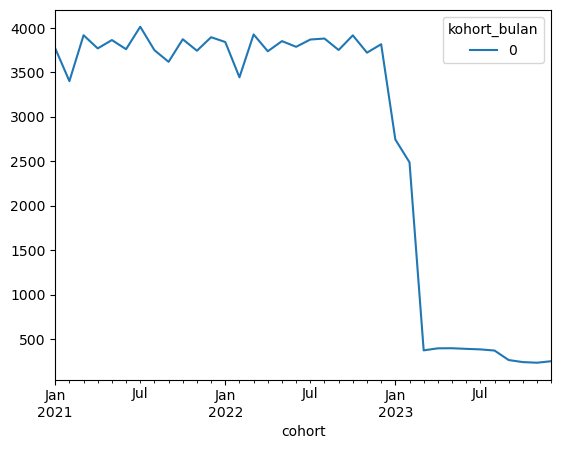

In [25]:
count_new_customers.plot(kind='line')

### Pertanyaan

1. Bagaimana karakteristik pertumbuhan customer di setiap bulannya? 

Pada tahun 2021 hingga 2022, pertumbuhannya melambat, dan di tahun 2023 pertumbuhan customer cenderung menurun.

# Time Series Analysis

1. Coba totalkan penjualan setiap barang per hari. Bagaimana trend penjualan? Apakah ada mengalami kenaikan, penurunan, atau stagnant.

-Terjadi puncak penjualan pada tanggal 1, dan memasuki tanggal 2 hingga 28, penjualan stagnan di angka 3000an, dan menurun pada tanggal 29-31 hingga angka 1000an.

In [26]:
# Product order per day
df_total_product_order_per_day = df_shopping.groupby('day')['quantity'].count()
df_total_product_order_per_day

day
1     4557
2     4440
3     3939
4     3006
5     3004
6     3039
7     3011
8     2967
9     2929
10    3015
11    3098
12    3024
13    3165
14    3299
15    3204
16    3190
17    3178
18    3183
19    3318
20    3241
21    3344
22    3238
23    3296
24    3326
25    3353
26    3179
27    3137
28    3252
29    2798
30    2871
31    1856
Name: quantity, dtype: int64

<Axes: xlabel='day'>

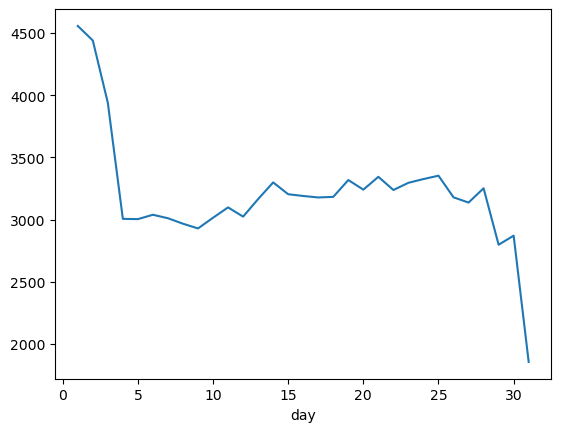

In [27]:
df_total_product_order_per_day.plot(kind='line')

2. Lakukan analisis seasonality dengan melihat total order per harinya dari Senin hingga Minggu.

Order tertinggi terjadi pada hari senin, dan order terendah di hari minggu.

In [28]:
# Product order weekly
df_weekly_order = df_shopping.groupby('day_name')['quantity'].count().sort_values(ascending=False)
df_weekly_order

day_name
Monday       14486
Saturday     14419
Friday       14358
Tuesday      14198
Thursday     14160
Wednesday    13935
Sunday       13901
Name: quantity, dtype: int64

<Axes: xlabel='day_name'>

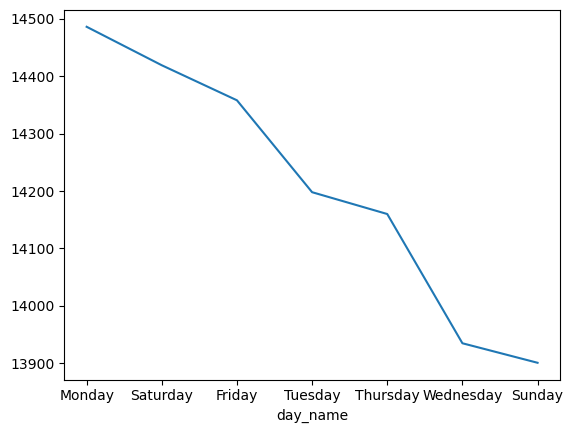

In [29]:
df_weekly_order.plot(kind='line')

# Price Elasticity

Pertanyaan 1 :
Produk apa yang paling sering mengalami perubahan harga?
Hitunglah banyaknya harga unik di setiap produk dan ambil daftar produk yang pernah terjual dengan setidaknya 10 variasi harga yang berbeda.

Price Elasticity akan semakin baik dianalisis ketika lebih banyak variasi harga yang muncul.

In [30]:
df_shopping["% Change in Demand"] = df_shopping["quantity"].pct_change()
df_shopping["% Change in Price"] = df_shopping["price"].pct_change()
df_shopping["Price Elasticity"] = df_shopping["% Change in Demand"] / df_shopping["% Change in Price"].sort_values(ascending=True).round(1)

In [31]:
df_20_sampel = df_shopping.sample(20)
df_20_sampel

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,...,final_segmentation,year,month,day,day_name,transaction_date,CohortMonth,% Change in Demand,% Change in Price,Price Elasticity
95992,I304902,C936510,Male,20,Food & Beverage,2,10.46,Cash,2022-12-08,Metrocity,...,Low,2022,12,8,Thursday,2022-12-01,2022-12-08,-0.333333,-0.994191,0.333333
86806,I144919,C284496,Female,48,Shoes,3,1800.51,Debit Card,2022-03-01,Kanyon,...,Super Populer,2022,3,1,Tuesday,2022-03-01,2022-03-01,0.000000,1.000033,0.000000
49422,I522643,C294914,Male,46,Clothing,3,900.24,Credit Card,2021-10-17,Metropol AVM,...,Super Populer,2021,10,17,Sunday,2021-10-01,2021-10-17,2.000000,2.000000,1.000000
43320,I153150,C760266,Female,33,Clothing,3,900.24,Credit Card,2022-09-02,Kanyon,...,Super Populer,2022,9,2,Friday,2022-09-01,2022-09-02,0.500000,85.065010,0.005875
8394,I141822,C316196,Female,67,Toys,5,179.20,Debit Card,2021-04-20,Metrocity,...,Super Populer,2021,4,20,Tuesday,2021-04-01,2021-04-20,0.666667,0.666667,0.952381
66065,I266125,C569655,Female,69,Clothing,3,900.24,Credit Card,2021-12-02,Kanyon,...,Super Populer,2021,12,2,Thursday,2021-12-01,2021-12-02,-0.250000,42.032505,-0.005952
75193,I287834,C302827,Female,37,Shoes,2,1200.34,Debit Card,2022-11-09,Mall of Istanbul,...,Super Populer,2022,11,9,Wednesday,2022-11-01,2022-11-09,0.000000,0.000000,NaN
2934,I131433,C200286,Female,30,Cosmetics,5,203.30,Cash,2022-03-25,Mall of Istanbul,...,Super Populer,2022,3,25,Friday,2022-03-01,2022-03-25,4.000000,4.000000,1.000000
50307,I276449,C897578,Female,19,Food & Beverage,2,10.46,Cash,2021-03-03,Metrocity,...,Low,2021,3,3,Wednesday,2021-03-01,2021-03-03,-0.600000,-0.861914,0.666667
33441,I264744,C688839,Male,68,Toys,2,71.68,Credit Card,2021-12-31,Mall of Istanbul,...,Super Populer,2021,12,31,Friday,2021-12-01,2021-12-31,-0.333333,-0.920377,0.370370


Pertanyaan 2 :
Dari semua produk yang terambil dari step 1, hitung lah korelasi antara harga dengan quantity untuk setiap barang.
Barang manakah yang memiliki korelasi paling negatif?

In [32]:
correlation = df_20_sampel['price'].corr(df_20_sampel['quantity']).round(2)
correlation

-0.12

In [33]:
df_sales_matrix = df_20_sampel.corr().round(2)
df_sales_matrix

C:\Users\User\AppData\Local\Temp\ipykernel_2444\3504037806.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sales_matrix = df_20_sampel.corr().round(2)


,age,quantity,price,total_revenue,year,month,day,% Change in Demand,% Change in Price,Price Elasticity
age,1.00,0.04,0.15,0.21,-0.36,0.21,0.34,-0.15,-0.01,0.21
quantity,0.04,1.00,-0.12,0.09,-0.15,-0.39,0.02,0.69,0.03,-0.06
price,0.15,-0.12,1.00,0.95,0.07,0.11,-0.52,-0.10,0.28,-0.17
total_revenue,0.21,0.09,0.95,1.00,0.00,0.01,-0.47,-0.01,0.33,-0.16
year,-0.36,-0.15,0.07,0.00,1.00,-0.41,0.02,0.16,0.09,0.08
month,0.21,-0.39,0.11,0.01,-0.41,1.00,-0.15,-0.34,0.17,0.20
day,0.34,0.02,-0.52,-0.47,0.02,-0.15,1.00,0.03,-0.38,0.08
% Change in Demand,-0.15,0.69,-0.10,-0.01,0.16,-0.34,0.03,1.00,-0.05,0.09
% Change in Price,-0.01,0.03,0.28,0.33,0.09,0.17,-0.38,-0.05,1.00,-0.09
Price Elasticity,0.21,-0.06,-0.17,-0.16,0.08,0.20,0.08,0.09,-0.09,1.00


In [57]:
df_sales_matrix = df_shopping.corr().round(2)
df_sales_matrix

C:\Users\User\AppData\Local\Temp\ipykernel_2812\3369759314.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sales_matrix = df_shopping.corr().round(2)


,age,quantity,price,total_revenue,year,month,day,% Change in Demand,% Change in Price,Price Elasticity,price_change
age,1.00,0.00,0.00,0.00,-0.00,0.01,0.01,0.00,-0.00,0.00,-0.00
quantity,0.00,1.00,0.34,0.46,0.00,0.01,-0.00,0.56,0.13,-0.13,0.13
price,0.00,0.34,1.00,0.96,-0.00,-0.00,0.00,0.19,0.39,0.07,0.39
total_revenue,0.00,0.46,0.96,1.00,0.00,-0.00,0.00,0.26,0.38,0.06,0.38
year,-0.00,0.00,-0.00,0.00,1.00,-0.15,-0.08,-0.00,0.01,-0.00,0.01
month,0.01,0.01,-0.00,-0.00,-0.15,1.00,-0.03,0.00,-0.01,-0.00,-0.01
day,0.01,-0.00,0.00,0.00,-0.08,-0.03,1.00,-0.00,-0.00,-0.00,-0.00
% Change in Demand,0.00,0.56,0.19,0.26,-0.00,0.00,-0.00,1.00,0.25,-0.20,0.25
% Change in Price,-0.00,0.13,0.39,0.38,0.01,-0.01,-0.00,0.25,1.00,-0.00,1.00
Price Elasticity,0.00,-0.13,0.07,0.06,-0.00,-0.00,-0.00,-0.20,-0.00,1.00,-0.00


Pertanyaan 3 : Buatlah scatter plot antara harga dan quantity untuk
barang dari soal sebelumnya.  
Apabila produk tersebut mengalami kenaikan harga, kira-kira apa yang
akan terjadi dengan penjualan ? Jumlah pembelian barang menurun

<Axes: xlabel='quantity', ylabel='price'>

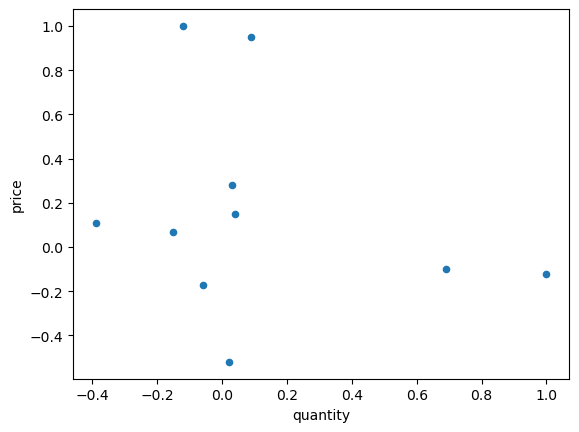

In [34]:
df_sales_matrix.plot(x='quantity',y='price',kind='scatter')

# Crucial Question

1. Berapa jumlah penjualan produk setiap kategorinya?

In [35]:
df_category_count = df_shopping.groupby('category')['invoice_no'].count().reset_index()
df_category_count.sort_values(by='invoice_no', ascending=False)

,category,invoice_no
1,Clothing,34487
2,Cosmetics,15097
3,Food & Beverage,14776
7,Toys,10087
4,Shoes,10034
5,Souvenir,4999
6,Technology,4996
0,Books,4981


2. Metode pembayaran apa yang digunakan setiap kategori produknya?

In [36]:
df_shopping.groupby('payment_method')['category'].value_counts() \
.sort_index() \
.unstack()\
.style.background_gradient(axis=0,cmap='RdBu_r')

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
payment_method,,,,,,,,
Cash,2268,15456,6674,6587,4474,2211,2235,4542
Credit Card,1696,12025,5336,5250,3553,1770,1753,3548
Debit Card,1017,7006,3087,2939,2007,1018,1008,1997


3. Berapa jumlah kategori yang terjual di setiap lokasi pusat perbelanjaan?

In [37]:
df_shopping.groupby('shopping_mall')['category'].value_counts() \
.sort_index() \
.unstack()\
.style.background_gradient(axis=0,cmap='RdBu_r')

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
shopping_mall,,,,,,,,
Cevahir AVM,258,1729,732,772,490,240,256,514
Emaar Square Mall,236,1651,760,692,498,247,263,464
Forum Istanbul,252,1729,770,712,458,261,234,531
Istinye Park,462,3353,1458,1490,1001,515,487,1015
Kanyon,1013,6840,3023,2909,2017,1037,997,1987
Mall of Istanbul,1025,6923,3050,2957,2023,948,1017,2000
Metrocity,752,5268,2265,2244,1457,738,772,1515
Metropol AVM,476,3525,1541,1517,1074,531,464,1033
Viaport Outlet,246,1708,734,733,497,225,256,515


4. Berapa jumlah pembeli berdasarkan jenis kelamin per kategori produknya?

In [38]:
df_shopping.groupby('gender')['category'].value_counts() \
.sort_index() \
.unstack()\
.style.background_gradient(axis=0,cmap='RdBu_r')

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
gender,,,,,,,,
Female,2906,20652,9070,8804,5967,3017,2981,6085
Male,2075,13835,6027,5972,4067,1982,2015,4002


5. Pusat perbelanjaan mana yang paling diminati pembeli?

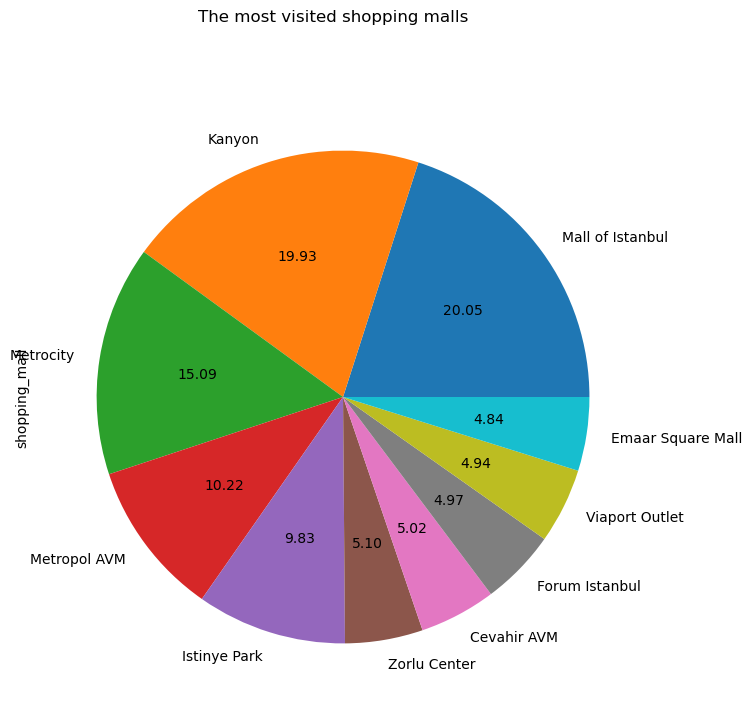

Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: shopping_mall, dtype: int64

In [39]:
df_shopping['shopping_mall'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(8,8), title='The most visited shopping malls')
plt.show()

df_shopping['shopping_mall'].value_counts()

6. Berapa revenue yang didapatkan setiap tahunnya?

<Axes: xlabel='year'>

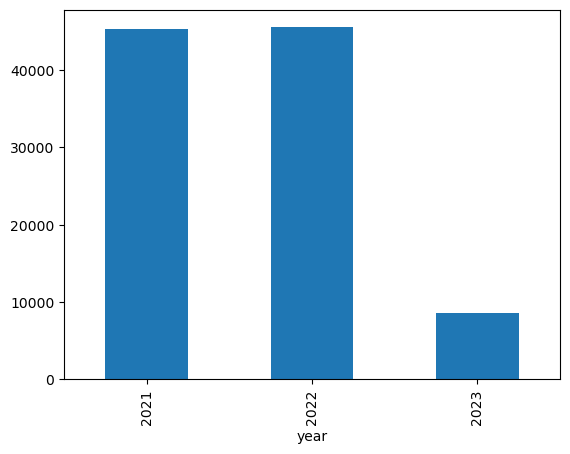

In [27]:
df_clothing_sales = df_shopping.groupby('year')['total_revenue'].count()
df_clothing_sales.plot(kind='bar')

7. Pembeli dengan order terbanyak

In [15]:
purchase_per_customer = df_shopping.groupby('customer_id')['quantity'].sum().sort_values(ascending=False).nlargest(5)
purchase_per_customer

customer_id
C100004    5
C211342    5
C154312    5
C324260    5
C211345    5
Name: quantity, dtype: int64